# EMAIL SPAM DETEECTION USING Random Forest Classifier

# 1. import libraries and loading dataset

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Text preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Label encoding (if necessary)
from sklearn.preprocessing import LabelEncoder

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

# Machine learning classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
frame = pd.read_csv(r"C:\Users\HomePC\Desktop\my_Desktop\spamEmail\spam1.csv", encoding="ISO-8859-1")
frame.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# checking the dataset info
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# checking for the data types
frame.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [8]:
# checking for missing values
frame.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
# checking the missing values using the boolean values
frame.isnull().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [10]:
# Checking the number of rows and columns in the dataset
frame.shape

(5572, 5)

In [11]:
# renaming columns
frame_renamed = frame.rename(columns = {"v1": "Category", "v2": "Message"})

In [12]:
frame_renamed.head()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
# drop irrelevant columns
columns_drop = frame_renamed.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [14]:
columns_drop.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# summary statistics for the dataset
columns_drop.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


# EXPLORATORY DATA ANALYSIS

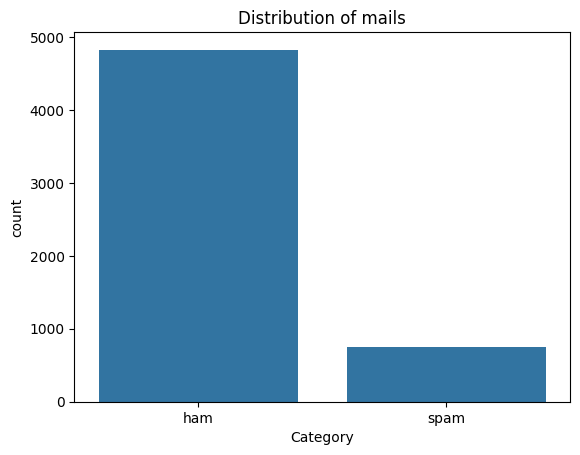

In [16]:
# Data Visualization
sns.countplot(data=columns_drop, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

# DATA PREPROCESSING 

Labe Encoding

In [17]:
columns_drop.loc[columns_drop["Category"] == "spam", "Category"] = 0
columns_drop.loc[columns_drop["Category"] == "ham", "Category"] = 1

In [18]:
# separating the input variable from the target variable
X = columns_drop["Message"]
Y = columns_drop["Category"]

Printing both x and y

In [19]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [20]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [21]:
# splitting data into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [22]:
# printing the shape of X
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [23]:
# Printing the shape of x_train and x-test
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


# Applying Vectorization - IF-IDF
TF-IDF stands for Term Frequency - Inverse Document Frequency. 
 
 It is a technique used to convert text data into numerical vectors so that machine learning models can work with it.



In [24]:
# Initialize TF-IDF Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [25]:
# Feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [26]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [27]:
# printing X_train
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [28]:
# printing X_train_features
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34758 stored elements and shape (4457, 7510)>
  Coords	Values
  (0, 4513)	0.2909649098524696
  (0, 3380)	0.21807195185332803
  (0, 3262)	0.25877035357606315
  (0, 3136)	0.440116181574609
  (0, 2122)	0.38613577623520473
  (0, 3386)	0.3219352588930141
  (0, 6599)	0.20296878731699391
  (0, 4296)	0.3891385935794867
  (0, 3979)	0.2410582143632299
  (0, 741)	0.3219352588930141
  (1, 7443)	0.35056971070320353
  (1, 6442)	0.5652509076654626
  (1, 6417)	0.4769136859540388
  (1, 6872)	0.4306015894277422
  (1, 4061)	0.380431198316959
  (2, 5825)	0.4917598465723273
  (2, 2226)	0.413484525934624
  (2, 3917)	0.40088501350982736
  (2, 2109)	0.42972812260098503
  (2, 933)	0.4917598465723273
  (3, 7453)	0.5202633571003087
  (3, 1842)	0.3708680641487708
  (3, 1599)	0.5927091854194291
  (3, 6140)	0.4903863168693604
  (4, 1842)	0.36051481797205776
  :	:
  (4452, 4636)	0.4030918768627523
  (4453, 1762)	0.45610005640082985
  (4453, 7273)	0.578773

# MODEL TRAINING

In [29]:
# Using Random Forest
model = RandomForestClassifier()
model.fit(X_train_features, Y_train)

RandomForestClassifier()

In [30]:
import pickle

# Save the trained model
pickle.dump(model, open('spam_model.pkl', 'wb'))

# Save the vectorizer
pickle.dump(feature_extraction, open('vectorizer.pkl', 'wb'))

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


Evaluating The Model

In [31]:
# Make predictions on the training data
predict_train_data = model.predict(X_train_features)

# MODEL EVALUATION

In [ ]:
Accuracy_train_data = accuracy_score(Y_train, predict_train_data)
print("Accuracy On Training Data:", Accuracy_train_data)

In [ ]:
# Predicting test data
predict_test_data = model.predict(X_test_features)

In [ ]:
# Model Evaluation
accuracy_test_data = accuracy_score(Y_test, predict_test_data)
print("Accuracy on test data:", accuracy_test_data)

Testing the model with new email message

In [ ]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

In [ ]:
new_mail=["is click in o u 2 u n ur plt  "]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

# Ploting predicted values against actual values - Confusion Matrix

In [ ]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

From the plot above:

132 (True Negative): Spam messages correctly predicted as spam.

23 (False Positive): Spam messages incorrectly predicted as ham.

0 (False Negative): Ham messages incorrectly predicted as spam.

960 (True Positive): Ham messages correctly predicted as ham.


Insights from This Confusion Matrix:

Overall Good Performance: The model classified 1092 out of 1115 messages correctly (132 + 960).

Zero False Negatives: The model never misclassified a ham message as spam. That’s good because users don’t like seeing legit messages in their spam folder!

Some False Positives: 23 spam messages were wrongly labeled as ham—this means some spam emails might still reach the inbox.

High Recall for Ham: Since all 960 ham messages were correctly detected, the recall for ham is perfect (1.0).

Precision Can Be Improved for Ham: Since 23 spam emails were misclassified as ham, there’s room to improve how precisely it detects ham.

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# Set stopwords
stop_words = ENGLISH_STOP_WORDS

# Collecting spam messages, join them as a string, and split them into individual words
spam_words = " ".join(columns_drop[columns_drop['Category'] == 0]['Message']).split()

# Collecting ham messages, join them as a string, and split them into individual words
ham_words = " ".join(columns_drop[columns_drop['Category'] == 1]['Message']).split()

# Removing common stopwords(e.g "is", "the")
filtered_spam_words = [word.lower() for word in spam_words if word.lower() not in stop_words]
filtered_ham_words = [word.lower() for word in ham_words if word.lower() not in stop_words]

# Counts how many times each word appears in the filtered lists and picks the top 7 most frequent words.
from collections import Counter
spam_freq = Counter(filtered_spam_words).most_common(7)
ham_freq = Counter(filtered_ham_words).most_common(7)

print("Top spam words:", spam_freq)
print("Top ham words:", ham_freq)


plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_freq), color='orange') # zip(*spam_freq) separates the word and frequency pairs for plotting.
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

### Save the model

In [ ]:
import pickle

# Save the trained model
pickle.dump(model, open('spam_model.pkl', 'wb'))

# Save the vectorizer
pickle.dump(feature_extraction, open('vectorizer.pkl', 'wb'))

print("Model and vectorizer saved successfully!")